In [1]:
import numpy as np
from scipy.special import voigt_profile as vp
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
# NP Necessary imports

<h1>Problem 1</h1>

In [2]:
T_1 = 6380
T_effavg = (4 /3) *(1 -(2 /5) **(5 /4)) *T_1
print('Average effective temperature across entire Sun: '\
    +format(T_effavg, '.2E') +' K')

Average effective temperature across entire Sun: 5.80E+03 K


<h1>Problem 2</h1>

<h2>(c) and (d)</h2>

In [3]:
def f_V(m, T, V):
    '''Function to return the velocity distribution
    at a given temperature for a particle.
    Inputs:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    m: Mass of the particle in kg. -float.
    T: Temperaure in Kelvin. -float
    V: Velcoities to run distribution over. -np.array
    Returns:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    f_V: Velocity distribution for inputted parameters
    -np.array'''
    k = 1.38e-23
    # NP Boltzmann constant in kgs units
    f_V = V **2 *np.exp(-1 *(m *V **2) /(2 *k *T))\
        *4 *np.pi *((m) /(2 *np.pi *k *T)) **1.5
    return f_V

def v0(T, m):
    '''Function to return the the most probable speed
    at a given temperature for a particle.
    Inputs:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    m: Mass of the particle in kg. -float.
    T: Temperaure in Kelvin. -float
    Returns:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    v0: Most probable speed in m/s for inputted parameters.
    -float'''
    k = 1.38e-23
    # NP Boltzmann constant in kgs units
    v0 = np.sqrt((2 *k *T) /(m))
    return v0

def vbar(T, m):
    '''Function to return the average speed
    at a given temperature for a particle.
    Inputs:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    m: Mass of the particle in kg. -float.
    T: Temperaure in Kelvin. -float
    Returns:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    v_bar: Average speed in m/s for inputted parameters.
    -float'''
    k = 1.38e-23
    # NP Boltzmann constant in kgs units
    v_bar = np.sqrt((8 *k *T) /(np.pi * m))
    return v_bar

def vesc(M, R):
    '''Function to return the escape velocity
    at a given temperature for a particle.
    Inputs:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    M: Mass of the planet in kg. -float.
    T: Radius of the planet. -float
    Returns:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    v_esc: Escape velocity in m/s for inputted parameters.
    -float'''
    G = 6.67e-11
    # NP Gravatational constant in kgs units
    v_esc = np.sqrt(2 *G *M /R)
    return v_esc

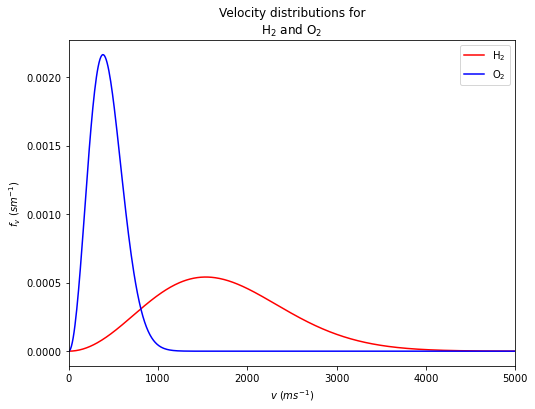

In [4]:
M_e = 5.98e24
# NP Earth's mass
G = 6.67e-11
R_e = np.sqrt(G * M_e /9.8)
# NP Calculating Earth's Radius
T_e = 285
# NP Earth's temperature
v_escEarth = vesc(M_e, R_e)
mH2 = 2 *1.67e-27
mO2 = 32 *1.67e-27
# NP Mass of diatomic hydrogen
V = np.linspace(0, 1000000, 100000)
# NP Creating array of velocities
f_VHEarth = f_V(mH2, T_e, V)
# NP Calculating velocity distribution for H2
# NP on Earth
f_VOEarth = f_V(mO2, T_e, V)
# NP Calculating velocity distribution for O2
# NP on Earth
iiE = V > v_escEarth
# NP Index of speeds greater than Earth's escape
# NP velocity
f = plt.figure(figsize = [8,6])
# NP Making plot larger
plt.plot(V, f_VHEarth, 'r', label = r'H$_2$')
# NP Plotting Hydrogen distribution for Earth
plt.plot(V, f_VOEarth, 'b', label = r'O$_2$')
# NP Plotting Oxygen distribution for Earth
plt.xlim(0, 5000)
# NP Limiting x-range to see shape better
plt.legend()
# NP Creating legend
plt.xlabel(r'$v$ $(m s^{-1})$')
# NP Labeling x-axis
plt.ylabel(r'$f_v$ $(s m^{-1})$')
# NP Labeling y-axis
plt.title(r'Velocity distributions for'
    '\nH$_2$ and O$_2$')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images'
    '/Earthvdistribs.png')
# NP Saving figure

In [5]:
fescHEarth = np.trapz(f_VHEarth[iiE],\
    V[iiE])/np.trapz(f_VHEarth, V)
# NP Calculating fraction of escaping H_2
print('Fraction of escaping H_2: '\
    +format(fescHEarth, '.2E'))
# NP Printing result
fescOEarth = np.trapz(f_VOEarth[iiE],\
    V[iiE])/np.trapz(f_VOEarth, V)
# NP Calculating fraction of escaping O_2
print('Fraction of escaping O_2: '\
    +format(fescOEarth, '.2E'))
# NP Printing result

Fraction of escaping H_2: 6.74E-23
Fraction of escaping O_2: 0.00E+00


<h2>(e)</h2>

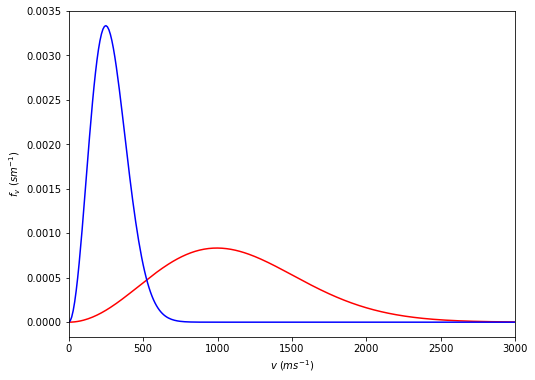

In [6]:
M_J = 1.9e27
# NP Earth's mass
R_J = 7.15e7
# NP Calculating Earth's Radius
T_J = 120
# NP Earth's temperature
v_escJ = vesc(M_J, R_J)
f_VHJ = f_V(mH2, T_J, V)
f_VOJ = f_V(mO2, T_J, V)
iiJ = V > v_escJ
f = plt.figure(figsize = [8,6])
plt.plot(V, f_VHJ, 'r')
plt.plot(V, f_VOJ, 'b')
plt.xlim(0, 3000)
plt.xlabel(r'$v$ $(m s^{-1})$')
plt.ylabel(r'$f_v$ $(s m^{-1})$')
plt.savefig('/d/www/nikhil/public_html/'
    'ASTR5420/images/Jupitervdistrib.png')

In [7]:
print('Hydrogen escape fraction: ' +format(np.trapz\
    (f_VHJ[iiJ], V[iiJ])/np.trapz(f_VHJ, V), '.2E'))
print('Oxygen escape fraction: ' +format(np.trapz\
    (f_VOJ[iiJ], V[iiJ])/np.trapz(f_VOJ, V), '.2E'))

Hydrogen escape fraction: 0.00E+00
Oxygen escape fraction: 0.00E+00


<h1>Problem 3</h1>

In [8]:
lambda1 = 1216e-10
# NP Lyman alpha wavelength in meters
c = 3e8
# NP Speed of light in m/s
Gamma = 1 /(10**-8)
# NP Radiative decay constant for Lyman alpha
dlambda = (lambda1**2) /(c) *(Gamma) /(2 *np.pi)
# NP Calculating wavelength of FWHM of this transition
print('Width in angstroms: ' +format(dlambda *1e10, '.2E'))
# NP Printing result in Angstroms

Width in angstroms: 7.84E-06


In [9]:
dldivl = dlambda /lambda1
# NP Calculating dl/l
print('dlmabda/lambda: ' +format(dldivl, '.2E'))
# NP Printing result

dlmabda/lambda: 6.45E-09


In [10]:
v_1 = c *dldivl
# NP Calculating speed for this transition
print('v: ' +format(v_1 *1e2, '.2E') +' cm/s')
# NP Printing result in cm/s

v: 1.94E+02 cm/s


In [11]:
R = lambda1 /dlambda
# NP Calculating required resoltion to see broadening
print('R: ' +format(R, '.2E'))
# NP Printing result

R: 1.55E+08


<h1>Problem 5</h1>

<h2>(a)</h2>

In [12]:
names = ['Spectrum_Vega.txt',\
         'Spectrum_Sun.txt',\
         'Spectrum_EpsVir.txt']
# NP Files of models to read in
model = [np.loadtxt('/d/users/nikhil/Downloads/'
    +i, usecols = (0, 1)) for i in names]
ws = [model[i].T[0] for i in range(len(model))]
# NP Reading in wavelengths of models
fs = [model[i].T[1] for i in range(len(model))]
# NP Reading in SED value of model

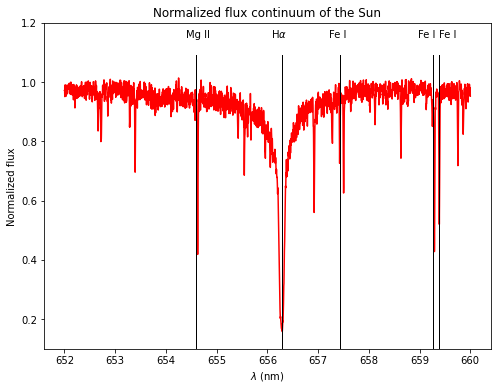

In [13]:
f = plt.figure(figsize = [8, 6])
# NP Making figure large
plt.plot(ws[1], fs[1], 'r')
# NP Plotting Sun values
plt.axvline(x = 656.28, ymin = 0.00, ymax = 0.9,\
    color = 'k', lw = 1)
plt.axvline(x = 659.2609, ymin = 0.00, ymax = 0.9,
    color = 'k', lw = 1)
plt.axvline(x = 659.38701, ymin = 0.00, ymax = 0.9,
    color = 'k', lw = 1)
plt.axvline(x = 657.4228, ymin = 0.00, ymax = 0.9,\
    color = 'k', lw = 1)
plt.axvline(x = 654.5973, ymin = 0.00, ymax = 0.9,\
    color = 'k', lw = 1)
# NP Plotting lines for different absorption features
plt.text(656.28 - 0.2, 1.15, r'H$\alpha$')
plt.text(659.2609 - 0.3, 1.15, r'Fe I')
plt.text(659.38701 - 0.0, 1.15, r'Fe I')
plt.text(657.4228 - 0.2, 1.15, r'Fe I')
plt.text(654.5973 - 0.2, 1.15, r'Mg II')
# NP Labeling features
plt.xlabel(r'$\lambda$ (nm)')
# NP Labeling x-axis
plt.ylabel('Normalized flux')
# NP Labelin y-axis
plt.title('Normalized flux continuum of the Sun')
# NP Labeling figure
plt.ylim(0.1, 1.2)
# NP Changing y-bounds to see labels
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images'
    '/Sunspec.png')
# NP Saving figure

<h2>(b)</h2>

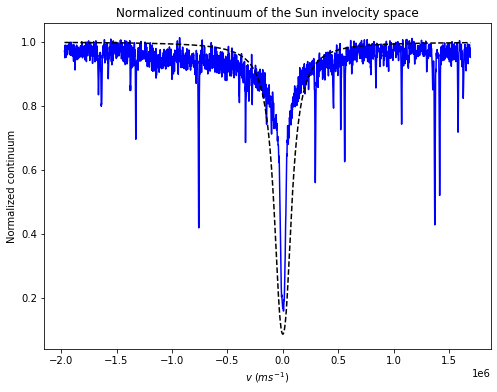

In [14]:
v_space = [[c *((l - 656.28) /(l)) for l in w]\
    for w in ws]
# NP Converting wavelengths to velocity space
f = plt.figure(figsize = [8, 6])
# NP Making figure larger
plt.plot(v_space[1], fs[1], 'b')
# NP Plotting Sun continuum in v space
plt.plot(v_space[1], np.exp(-400000 \
    *(vp(v_space[1], 10000, 50000))), '--k')
# NP Plotting best-fit Voigt
plt.xlabel(r'$v$ ($ms^{-1}$)')
# NP Labeling x-axis
plt.ylabel('Normalized continuum')
# NP Labeling y-axis
plt.title('Normalized continuum of the Sun in'
    'velocity space')
# NP Labeling Plot
plt.savefig('/d/www/nikhil/public_html/ASTR5420'
    '/images/Sunspecv.png')
# NP Saving figure

<h2>(c)</h2>

In [15]:
T = (10000) **2 *(mH2 /2) /(1.38e-23)
# NP Calculating temperature
print('Temperature: ' +format(T, '.2E') +' K')
# NP Printing result

Temperature: 1.21E+04 K


<h2>(d)</h2>

In [16]:
W = np.trapz(1-fs[1], ws[1])
# NP Calculating equivalent width
print('Equivalent width: ' +format(W, '.2E') +\
     ' nm')
# NP Printing result

Equivalent width: 6.58E-01 nm


<h2>(e)</h2>

In [17]:
print('Pixel scale: ' +format(len(v_space[1])\
    /(max(v_space[1]) -min(v_space[1])), '.2E')\
    +' pixels / m/s')
# NP Calculating pixel scale
print('Convolution for models: ' +format(100000/\
    ((max(v_space[1])-min(v_space[1]))/\
    (len(v_space[1]))), '.2E') +' pix')
# NP Calculating convolution for models in pixel space

Pixel scale: 2.19E-03 pixels / m/s
Convolution for models: 2.19E+02 pix


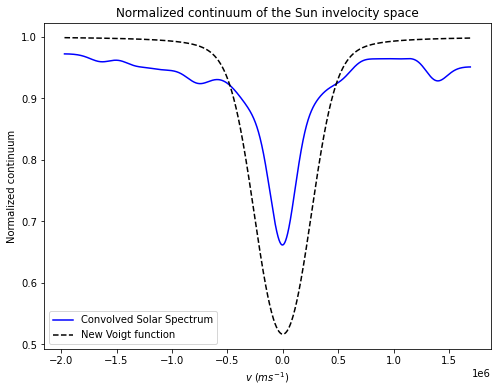

In [18]:
f = plt.figure(figsize = [8, 6])
# NP Making figure larger
sun_convol = gaussian_filter(fs[1], sigma=219)
# NP Convolving Solar spectrum
plt.plot(v_space[1], sun_convol, '-b',\
    label = 'Convolved Solar Spectrum')
# NP Plotting convolved Solar spectrum
plt.plot(v_space[1], np.exp(-400000 \
    *(vp(v_space[1], 200000, 50000))), '--k'\
    ,label = 'New Voigt function')
# NP Plotting best-fit Voigt
plt.xlabel(r'$v$ ($ms^{-1}$)')
# NP Labeling x-axis
plt.ylabel('Normalized continuum')
# NP Labeling y-axis
plt.title('Normalized continuum of the Sun in'
    'velocity space')
# NP Labeling Plot
plt.legend()
plt.savefig('/d/www/nikhil/public_html/ASTR5420'
    '/images/convolvedsunspec.png')
# NP Saving figure

<h2>(f)</h2>

In [19]:
W2 = np.trapz(1-sun_convol, v_space[1])
# NP Calculating equivalent width
print('Equivalent width: ' +format(W2, '.2E') +\
     ' m/s')
# NP Printing result in m/s
print('Pixel scale: ' +format(len(ws[1])\
    /(max(ws[1]) -min(ws[1])), '.2E')\
    +' pixels / nm')
# NP Calculating pixel scale in nm
print('Equivalent width in nm: ' \
    +format(W2 *2.19e-6, '.2E'))
# NP Converting equivalent width to nm

Equivalent width: 3.01E+05 m/s
Pixel scale: 1.00E+03 pixels / nm
Equivalent width in nm: 6.59E-01


In [ ]:
<h2>(g)</h2>

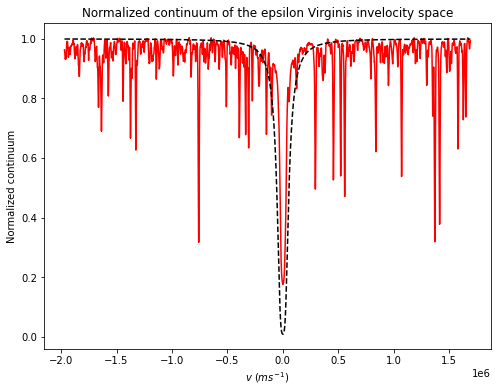

In [20]:
v_space = [[c *((l - 656.28) /(l)) for l in w]\
    for w in ws]
# NP Converting wavelengths to velocity space
f = plt.figure(figsize = [8, 6])
# NP Making figure larger
plt.plot(v_space[2], fs[2], 'r')
# NP Plotting epsilon virginis continuum in v space
plt.plot(v_space[2], np.exp(-350000 \
    *(vp(v_space[2], 10000, 20000))), '--k')
# NP Plotting best-fit Voigt
plt.xlabel(r'$v$ ($ms^{-1}$)')
# NP Labeling x-axis
plt.ylabel('Normalized continuum')
# NP Labeling y-axis
plt.title('Normalized continuum of the epsilon Virginis in'
    'velocity space')
# NP Labeling Plot
plt.savefig('/d/www/nikhil/public_html/ASTR5420'
    '/images/epsvir.png')
# NP Saving figure

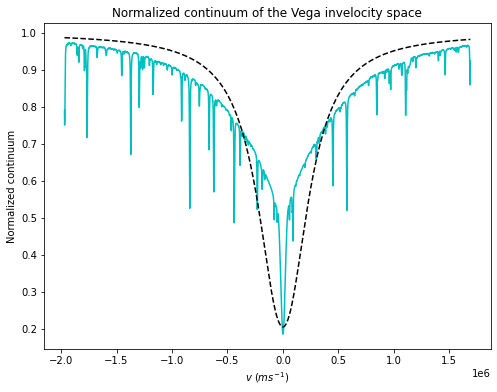

In [21]:
f = plt.figure(figsize = [8, 6])
# NP Making figure larger
plt.plot(v_space[0], fs[0], 'c')
# NP Plotting Sun continuum in v space
plt.plot(v_space[0], np.exp(-900000 \
    *(vp(v_space[0], 15000, 180000))), '--k')
# NP Plotting best-fit Voigt
plt.xlabel(r'$v$ ($ms^{-1}$)')
# NP Labeling x-axis
plt.ylabel('Normalized continuum')
# NP Labeling y-axis
plt.title('Normalized continuum of the Vega in'
    'velocity space')
# NP Labeling Plot
plt.savefig('/d/www/nikhil/public_html/ASTR5420'
    '/images/vegspec.png')
# NP Saving figure

In [22]:
Tvega = (15000) **2 *(mH2 /2) /(1.38e-23)
# NP Calculating temperature
print('Temperature: ' +format(Tvega, '.2E') +' K')
# NP Printing result

Temperature: 2.72E+04 K
